# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/netflix-stock-price-prediction/NFLX.csv


# Data Loading

In [2]:
df = pd.read_csv("/kaggle/input/netflix-stock-price-prediction/NFLX.csv")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


# Data Preparation

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.shape

(1009, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [8]:
train, test = train_test_split(df, test_size = 0.2)

In [9]:
test_pred = test.copy()

In [10]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
48,2018-04-16,315.989990,316.100006,304.000000,307.779999,307.779999,20307900
725,2020-12-21,530.049988,532.619995,521.150024,528.909973,528.909973,3894000
182,2018-10-24,332.279999,333.000000,300.730011,301.829987,301.829987,19039300
363,2019-07-17,366.250000,366.500000,361.750000,362.440002,362.440002,13639500
15,2018-02-27,294.769989,297.359985,290.589996,290.609985,290.609985,9416500
101,2018-06-29,399.190002,401.329987,390.549988,391.429993,391.429993,9252500
216,2018-12-13,277.640015,279.320007,271.850006,276.019989,276.019989,8379300
598,2020-06-22,455.010010,468.589996,454.209991,468.040009,468.040009,6272100
354,2019-07-03,376.690002,381.989990,375.839996,381.720001,381.720001,3799000
989,2022-01-07,549.460022,553.429993,538.219971,541.059998,541.059998,3381700


In [11]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
16,2018-02-28,293.100006,295.750000,290.779999,291.380005,291.380005,7653500
745,2021-01-21,582.450012,588.750000,570.400024,579.840027,579.840027,11802100
402,2019-09-11,285.700012,292.649994,284.609985,288.269989,288.269989,7405900
513,2020-02-20,386.559998,389.700012,376.679993,386.000000,386.000000,4079400
742,2021-01-15,500.000000,506.320007,495.100006,497.980011,497.980011,5895800
56,2018-04-26,310.000000,316.630005,305.579987,313.980011,313.980011,9266700
805,2021-04-19,546.900024,556.440002,545.530029,554.440002,554.440002,4288700
783,2021-03-17,522.000000,528.369995,514.299988,524.440002,524.440002,2817400
693,2020-11-04,495.359985,507.730011,493.980011,496.950012,496.950012,5137300
399,2019-09-06,293.350006,293.350006,287.029999,290.170013,290.170013,5166600


In [12]:
x_train = train[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Adj Close', 'Volume']].values

In [13]:
y_train = train['Close'].values
y_test = test['Close'].values

# Linear Regression

In [14]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model_lnr.predict(x_test)

In [16]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 254.259995, 11896100]])
print(result)

[254.259995]


# Model Evaluation

In [17]:
print("MSE",round(mean_squared_error(y_test,y_pred), 4))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 4))
print("R2 Score : ", r2_score(y_test,y_pred))

MSE 0.0
RMSE 0.0
R2 Score :  1.0


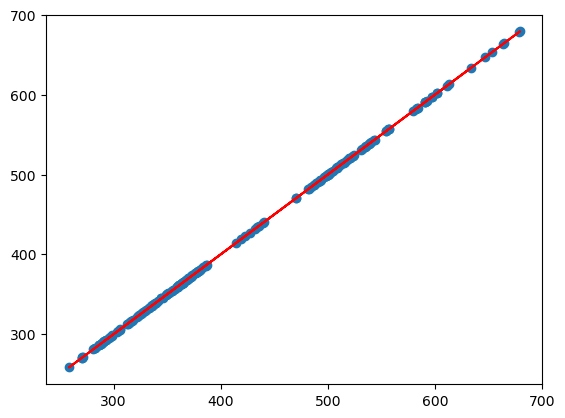

In [18]:
plt.scatter(y_pred, y_test)
plt.plot(y_pred, y_test, color='red')

In [19]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
16,2018-02-28,293.100006,295.750000,290.779999,291.380005,291.380005,7653500,291.380005
745,2021-01-21,582.450012,588.750000,570.400024,579.840027,579.840027,11802100,579.840027
402,2019-09-11,285.700012,292.649994,284.609985,288.269989,288.269989,7405900,288.269989
513,2020-02-20,386.559998,389.700012,376.679993,386.000000,386.000000,4079400,386.000000
742,2021-01-15,500.000000,506.320007,495.100006,497.980011,497.980011,5895800,497.980011
...,...,...,...,...,...,...,...,...
798,2021-04-08,551.130005,556.900024,547.570007,554.580017,554.580017,4309800,554.580017
936,2021-10-22,651.809998,665.460022,651.809998,664.780029,664.780029,6186000,664.780029
624,2020-07-29,492.250000,494.920013,484.130005,484.480011,484.480011,6611800,484.480011
364,2019-07-18,323.760010,329.850006,320.299988,325.209991,325.209991,31287100,325.209991


In [20]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,421.59495,106.528161,258.269989,338.35749,374.925003,510.309998,679.330017
Close_Prediction,202.0,421.59495,106.528161,258.269989,338.35749,374.925003,510.309998,679.330017
